<a href="https://colab.research.google.com/github/donaldocelaj/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/Linear%20Regression%20Sprint%20Completion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import everything you could ever need. ;)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# Ukraine Used Car Sale Price Prediction
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv')
print(df.shape)

(8495, 9)


In [5]:
df.head()

,make,price,body,mileage,engV,engType,registration,year,drive,age
0,23,15500.0,0,68,2.5,1,1,2010,1,7
1,50,20500.0,3,173,1.8,1,1,2011,2,6
2,50,35000.0,2,135,5.5,3,1,2008,2,9
3,50,17800.0,5,162,1.8,0,1,2012,0,5
4,55,16600.0,0,83,2.0,3,1,2013,1,4


# Predictive Modeling with Linear Regression

## 1.1 Divide the dataset features into an X matrix and y vector ("price" is what we want to predict).

In [4]:
#Create a new column for age of the car
df['age'] = 2017 - df['year']
df.head(10)

,make,price,body,mileage,engV,engType,registration,year,drive,age
0,23,15500.000,0,68,2.5,1,1,2010,1,7
1,50,20500.000,3,173,1.8,1,1,2011,2,6
2,50,35000.000,2,135,5.5,3,1,2008,2,9
3,50,17800.000,5,162,1.8,0,1,2012,0,5
4,55,16600.000,0,83,2.0,3,1,2013,1,4
5,30,6500.000,3,199,2.0,3,1,2003,0,14
6,59,10500.000,4,185,1.5,0,1,2011,0,6
7,50,21500.000,3,146,1.8,1,1,2012,2,5
8,50,22700.000,3,125,2.2,0,1,2010,2,7
9,55,20447.154,0,0,1.2,3,1,2016,0,1


In [8]:
#I dropped all the columns that intuitively would have nothing to do with the price of a car
X = df.loc[:, ['mileage', 'engV', 'registration', 'age']].values
X

array([[ 68. ,   2.5,   1. ,   7. ],
       [173. ,   1.8,   1. ,   6. ],
       [135. ,   5.5,   1. ,   9. ],
       ...,
       [180. ,   3.5,   1. ,   9. ],
       [150. ,   3.5,   1. ,   9. ],
       [ 71. ,   3.6,   1. ,  10. ]])

In [9]:
y = df['price'].values
y

array([15500., 20500., 35000., ..., 18500., 16999., 22500.])

## 1.2 Split the data into test and train datasets using train_test_split

In [0]:
#Test size of 20%, training size of 80%
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.2)

## 1.3 Use Scikit-Learn to fit a multiple regression model using your training data.

In [11]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## 1.4 Report the Intercept and Coefficient Values for the fitted model

In [12]:
beta_i = model.coef_
beta_0 = model.intercept_


print('Slope Coefficient: ', beta_i)
print('Intercept Value: ', beta_0)

Slope Coefficient:  [  -47.26222664   387.24663184  2699.1339039  -1047.11738751]
Intercept Value:  30402.52483744286


## 1.5 Use the test data to make predictions

In [13]:
predictions = model.predict(X_test)
print(predictions.shape)
print(predictions)

(1699,)
[23619.70642375 17967.08142256 14905.12573586 ... 17983.54529423
 21506.34716874 17167.58672376]


## 1.6 Calculate and report both the Root-Mean-Square error and $R^2$ for the model. 

In [0]:
RMSE = (np.sqrt(mean_squared_error(Y_test, predictions)))
R2 = r2_score(Y_test, predictions)

In [15]:
print(RMSE)
print(R2)

22950.53075173616
0.17372262064524402


## 1.7 How should we interpret the coefficient corresponding to the "year" feature?

I replaced the year value with age because it makes much more sense to do it this way. And the slope is very steeply downward, as age increases and the car becomes older, its value tends to strongly decrease, by ~$1047 per year. 

## 1.8 How should we interpret the Root-Mean-Square Error?

Root mean square error predic is a measure of how well our test model predicts the training model. Higher root mean square error is an indicator that our predictions are very far off from the actual values.

Our root mean square error is still very high and this is an indicator that the X values we're using to predict our y values are very ineffective at predicting it

## 1.9 How should we interpret the $R^2$?

R^2 is not as effective a measure as mean square error but is still helpful in determining what percentage of our variation in the response data. Our R^2 is very low and this is an indicator that our model is only predicting 17% of the given variation.

# Log-Linear and Polynomial Regression

## 2.1 Engineer a new variable by taking the log of the price varible.

In [0]:
df['ln_price'] = np.log(df['price'])

In [17]:
df.head(10)

,make,price,body,mileage,engV,engType,registration,year,drive,age,ln_price
0,23,15500.000,0,68,2.5,1,1,2010,1,7,9.648595
1,50,20500.000,3,173,1.8,1,1,2011,2,6,9.928180
2,50,35000.000,2,135,5.5,3,1,2008,2,9,10.463103
3,50,17800.000,5,162,1.8,0,1,2012,0,5,9.786954
4,55,16600.000,0,83,2.0,3,1,2013,1,4,9.717158
5,30,6500.000,3,199,2.0,3,1,2003,0,14,8.779557
6,59,10500.000,4,185,1.5,0,1,2011,0,6,9.259131
7,50,21500.000,3,146,1.8,1,1,2012,2,5,9.975808
8,50,22700.000,3,125,2.2,0,1,2010,2,7,10.030120
9,55,20447.154,0,0,1.2,3,1,2016,0,1,9.925599


## 2.2 Use scatterplots or seaborn's pairplot function to do the "eyeball test" for non-linearly distributed features.

In [0]:
columns = df.columns.drop(['price', 'ln_price'])

In [19]:
columns

Index(['make', 'body', 'mileage', 'engV', 'engType', 'registration', 'year',
       'drive', 'age'],
      dtype='object')

In [0]:
samples = df.sample(frac=.1, replace=True)

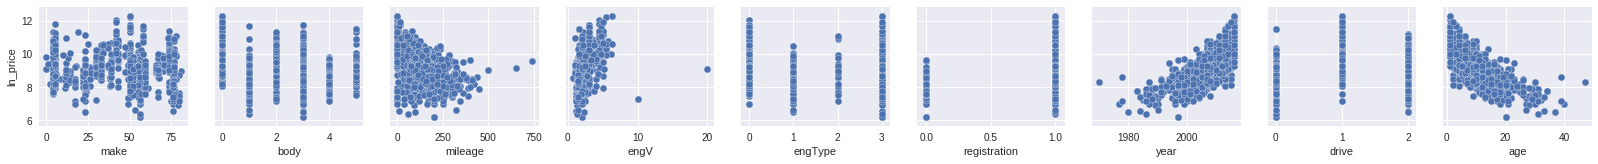

In [21]:
sns.pairplot(data=samples, y_vars=['ln_price'], x_vars=columns)

## 2.3 If appropriate, create any polynomial features. 

Year seemed to be the only highly evident feature that needed to be made into a polynomial feature.

In [0]:
df['year_squared'] = df['year']**2

In [23]:
df.head(10)

,make,price,body,mileage,engV,engType,registration,year,drive,age,ln_price,year_squared
0,23,15500.000,0,68,2.5,1,1,2010,1,7,9.648595,4040100
1,50,20500.000,3,173,1.8,1,1,2011,2,6,9.928180,4044121
2,50,35000.000,2,135,5.5,3,1,2008,2,9,10.463103,4032064
3,50,17800.000,5,162,1.8,0,1,2012,0,5,9.786954,4048144
4,55,16600.000,0,83,2.0,3,1,2013,1,4,9.717158,4052169
5,30,6500.000,3,199,2.0,3,1,2003,0,14,8.779557,4012009
6,59,10500.000,4,185,1.5,0,1,2011,0,6,9.259131,4044121
7,50,21500.000,3,146,1.8,1,1,2012,2,5,9.975808,4048144
8,50,22700.000,3,125,2.2,0,1,2010,2,7,10.030120,4040100
9,55,20447.154,0,0,1.2,3,1,2016,0,1,9.925599,4064256


## 2.4 Use the new log-transformed y variable and your x variables (including any new polynomial features) to fit a new linear regression model. Then report the: intercept, coefficients, RMSE, and $R^2$.

In [0]:
y = df.loc[:, ['ln_price']].values

In [25]:
y

array([[ 9.6485953 ],
       [ 9.92818017],
       [10.46310334],
       ...,
       [ 9.82552601],
       [ 9.7409098 ],
       [10.02127059]])

In [26]:
df.columns

Index(['make', 'price', 'body', 'mileage', 'engV', 'engType', 'registration',
       'year', 'drive', 'age', 'ln_price', 'year_squared'],
      dtype='object')

In [34]:
X = df.loc[:, ['mileage', 'engV', 'registration', 'age', 'year', 'year_squared']].values
X

array([[6.800000e+01, 2.500000e+00, 1.000000e+00, 7.000000e+00,
        2.010000e+03, 4.040100e+06],
       [1.730000e+02, 1.800000e+00, 1.000000e+00, 6.000000e+00,
        2.011000e+03, 4.044121e+06],
       [1.350000e+02, 5.500000e+00, 1.000000e+00, 9.000000e+00,
        2.008000e+03, 4.032064e+06],
       ...,
       [1.800000e+02, 3.500000e+00, 1.000000e+00, 9.000000e+00,
        2.008000e+03, 4.032064e+06],
       [1.500000e+02, 3.500000e+00, 1.000000e+00, 9.000000e+00,
        2.008000e+03, 4.032064e+06],
       [7.100000e+01, 3.600000e+00, 1.000000e+00, 1.000000e+01,
        2.007000e+03, 4.028049e+06]])

In [35]:
#Test size of 20%, training size of 80%
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.2)

model = LinearRegression()
model.fit(X_train, Y_train)

predictions = model.predict(X_test)

beta_i = model.coef_
beta_0 = model.intercept_


print('Slope Coefficient: ', beta_i)
print('Intercept Value: ', beta_0)


Slope Coefficient:  [[ 5.68955268e-04  1.14673407e-02  5.64246086e-01  4.13212983e+00
  -4.13212983e+00  2.08922745e-03]]
Intercept Value:  [-155.14099379]


In [36]:

RMSE = (np.sqrt(mean_squared_error(Y_test, predictions)))
R2 = r2_score(Y_test, predictions)

print('RMSE: ', RMSE)
print('R^2: ', R2)

RMSE:  0.6317505354537777
R^2:  0.5306475838029412


## 2.5 How might we interpret the coefficient on "year" in this new regression model?

Since we now are using the log of the price and not the price, we see that the log of the price still decreases as the year increases (as it did in section 1), but it now decreases by a smaller number than before (4.13, compared to  1047). 
This makes complete intuitive sense since the range of ln_price is much smaller than price. 



# Gradient Descent

## 3.1 What does Gradient Descent seek to minimize?

Gradient descent seeks to minimize the cost function, which in our case, is how the root mean squared error increases or decreases which I explained previously in section 1.8(but there are other cost functions that can also be used in gradient descent). 

By picking an arbitrary point in the cost funciton, and then using several iterations to update where we are in the cost function, and using the rate at which the cost function is decreasing (or increasing) to update where our next iteration will be, we can get to the lowest cost.

## 3.2 What is the "Learning Rate" and what is its function?

Learning rate determines the amount of steps we want to take toward finding the lowest point in the cost function. Higher learning rates are less computationally draining but risk overshooting and missing the lowest point in the cost funciton. 

Low learning rates require more computation and therefore more time but are significantly less likely to miss the lowest point in the cost function. 

In smaller datasets it is safer to lean towards very small learning rates.in very large datasets where time is limited, it is more optimal to have a relatively higher learning rate than in the previous scenario.

# Model Diagnostics

## 4.1 Use statsmodels to run a log-linear or log-polynomial linear regression with robust standard errors.

In [37]:
df.columns

Index(['make', 'price', 'body', 'mileage', 'engV', 'engType', 'registration',
       'year', 'drive', 'age', 'ln_price', 'year_squared'],
      dtype='object')

In [0]:
X = df[['make', 'body', 'mileage', 'engV', 'engType', 'registration',
       'year', 'drive', 'age', 'year_squared']]
y = df['ln_price']

X = sm.add_constant(X)

In [0]:
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

In [40]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     1948.
Date:                Fri, 22 Feb 2019   Prob (F-statistic):               0.00
Time:                        18:15:53   Log-Likelihood:                -6964.2
No. Observations:                8495   AIC:                         1.395e+04
Df Residuals:                    8485   BIC:                         1.402e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -7.049e-05   1.48e-06    -47.778   

## 4.2 Calculate the Variance Inflation Factor (VIF) of our X variables. Do we have multicollinearity problems?

We have multicollinearity problems when our VIF is higher than 10 for any given column.

In [41]:
print(X.columns)

Index(['const', 'make', 'body', 'mileage', 'engV', 'engType', 'registration',
       'year', 'drive', 'age', 'year_squared'],
      dtype='object')


In [0]:
columns=X.columns

In [43]:
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1386: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.6/dist-packages/statsmodels/stats/outliers_influence.py:167: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [44]:
print(vif)

[0.0, 1.0604314751619817, 1.15835277419146, 1.9368892032945366, 1.0100376419582828, 1.1547598212323116, 1.1085146982201803, inf, 1.1396338223459712, inf, 141937.91485709895]


In [0]:
#Here I put together my columns with their respective variance inflation factors.
#This makes it easier to read.
zips = set(zip(columns, vif))

In [46]:
zips


{('age', inf),
 ('body', 1.15835277419146),
 ('const', 0.0),
 ('drive', 1.1396338223459712),
 ('engType', 1.1547598212323116),
 ('engV', 1.0100376419582828),
 ('make', 1.0604314751619817),
 ('mileage', 1.9368892032945366),
 ('registration', 1.1085146982201803),
 ('year', inf),
 ('year_squared', 141937.91485709895)}

Since the age column was created directly using the year column, It makes sense that the age column is entirely dependent on the year column and therefore they both have a variance inflation factor of infinity.

Year_squared was also created by squaring the year column and therefore they also have a variance inflation factor of infinity.

Aside from age, year, and year_squared, we have no other colinearity problems. 